In [2]:
import pickle
import sys
#sys.path.append(r"c:\users\41792\appdata\local\packages\pythonsoftwarefoundation.python.3.10_qbz5n2kfra8p0\localcache\local-packages\python310\site-packages")
import pandas
import gzip
import cv2
import matplotlib.pyplot as plt

In [3]:
#Import data

with gzip.open("train.pkl", "rb") as file:
    X = pickle.load(file)

In [14]:
#Check keys

first_sample = X[64]
print(first_sample.keys())
print(first_sample["frames"])
print(first_sample["dataset"])
print(first_sample["box"].shape)
print(first_sample["label"].shape)
print(first_sample["video"].shape)
print(first_sample["video"].dtype)

dict_keys(['name', 'video', 'box', 'label', 'frames', 'dataset'])
[1, 18, 47]
expert
(586, 600)
(586, 600, 65)
(586, 600, 65)
uint8


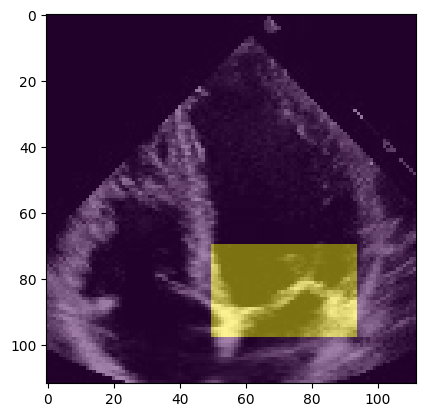

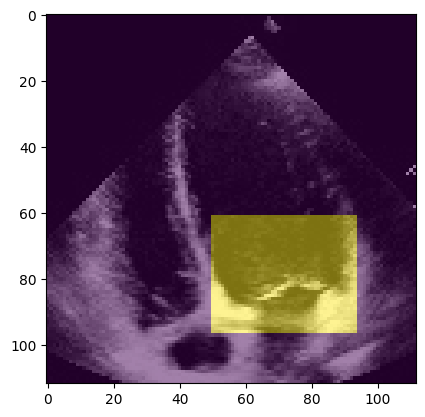

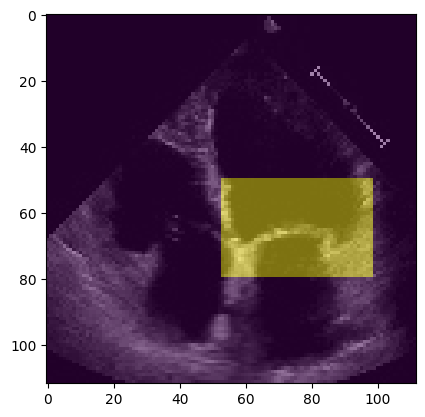

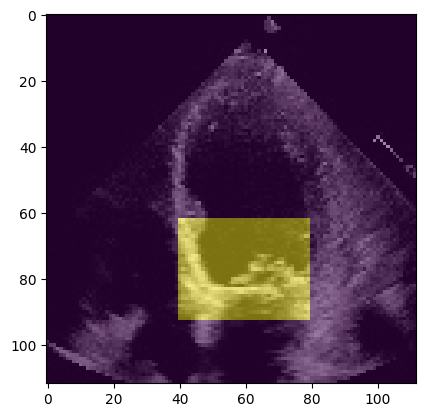

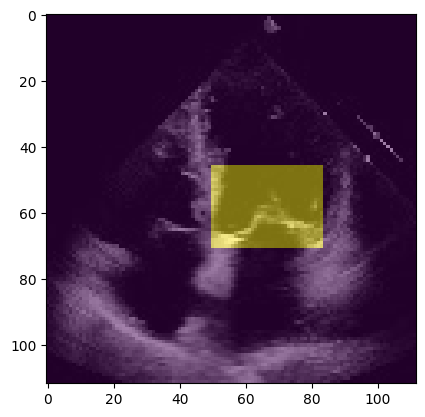

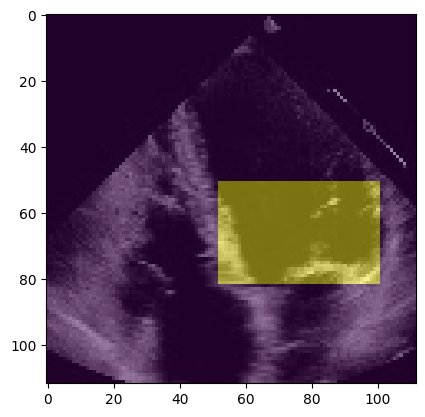

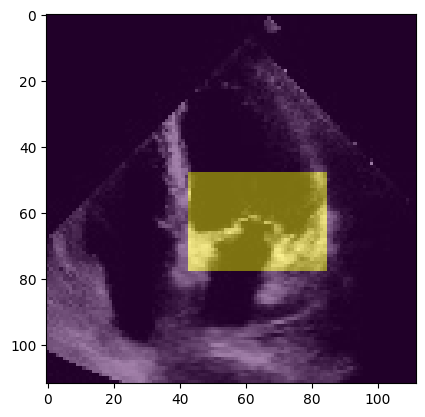

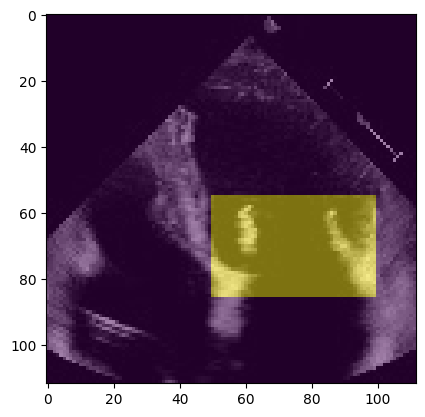

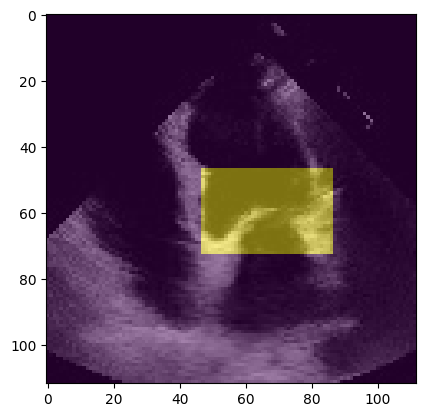

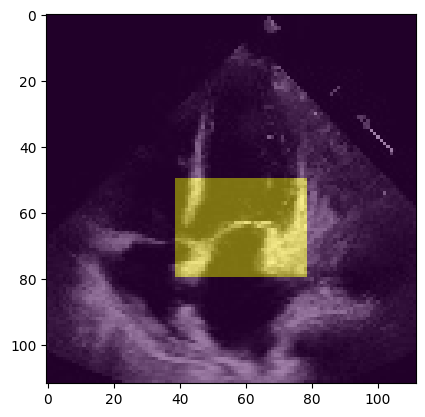

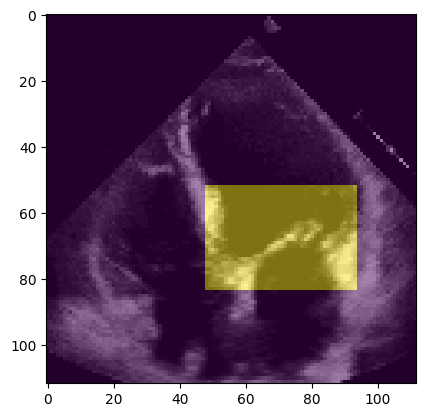

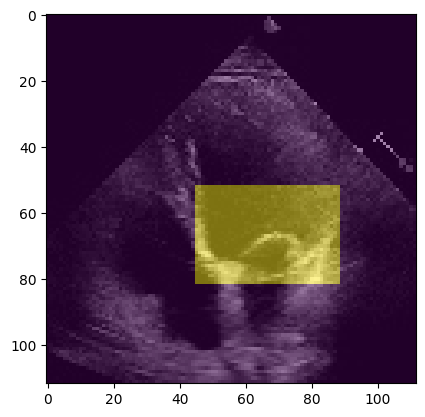

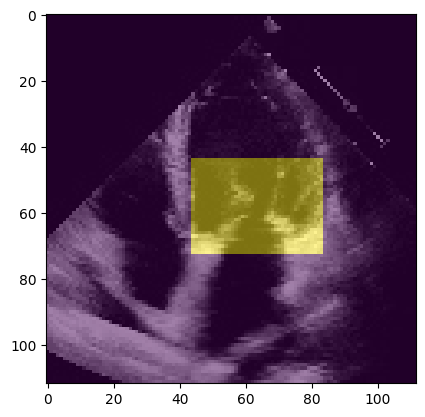

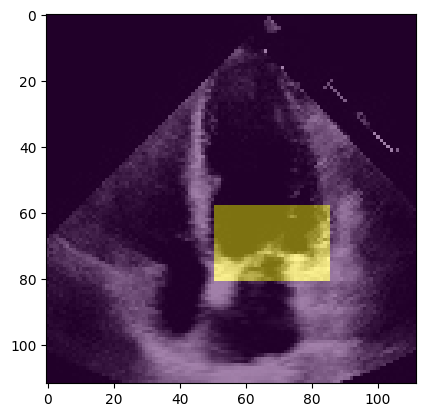

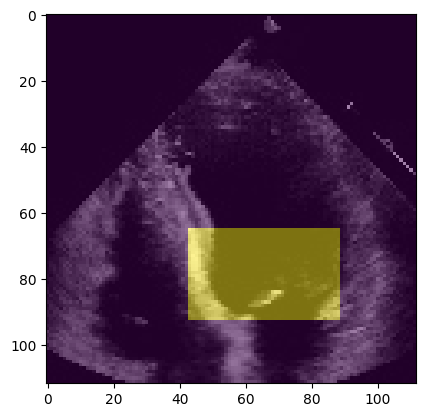

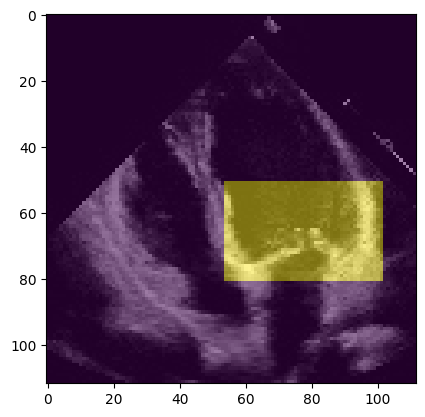

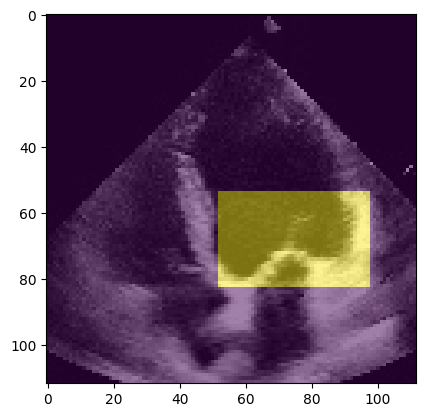

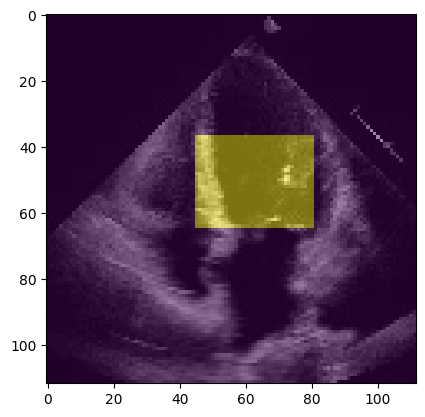

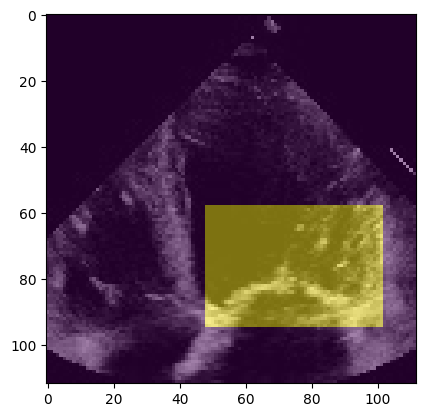

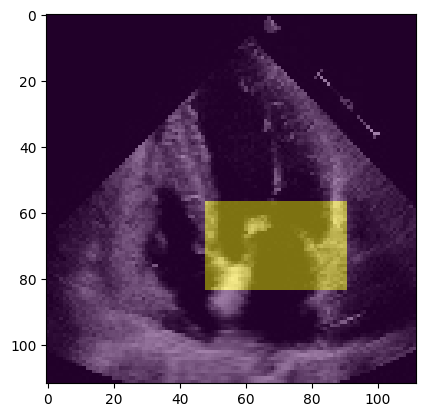

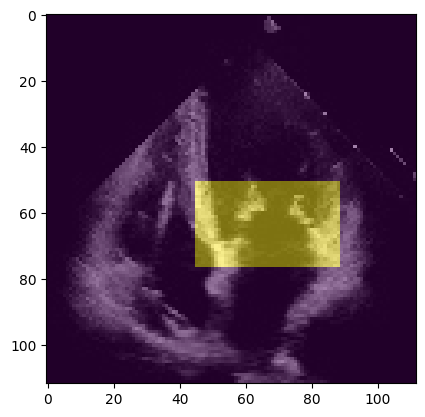

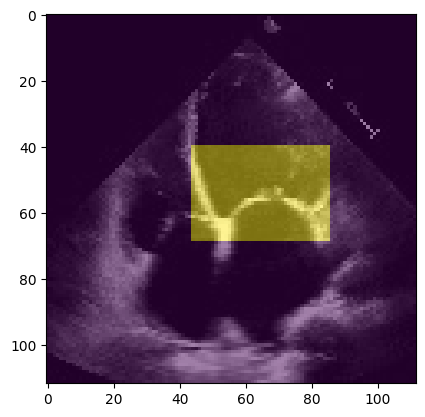

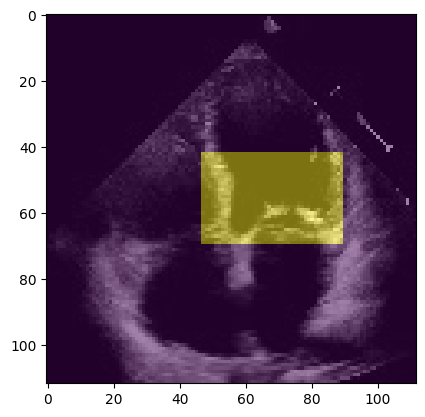

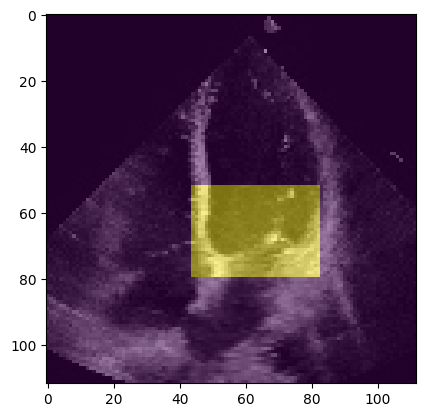

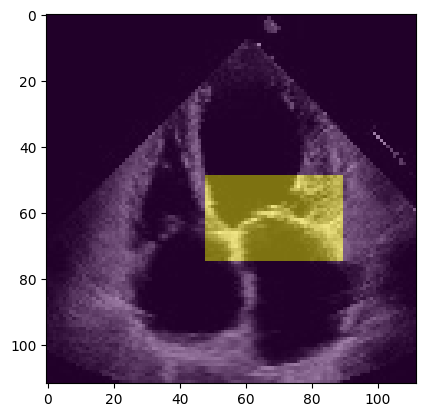

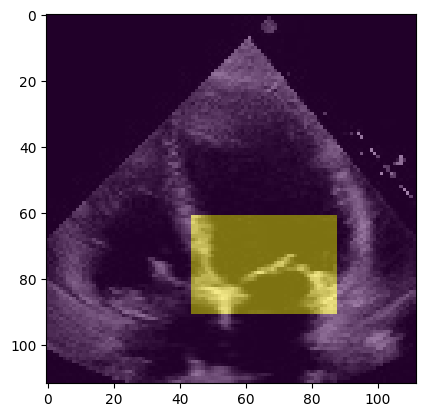

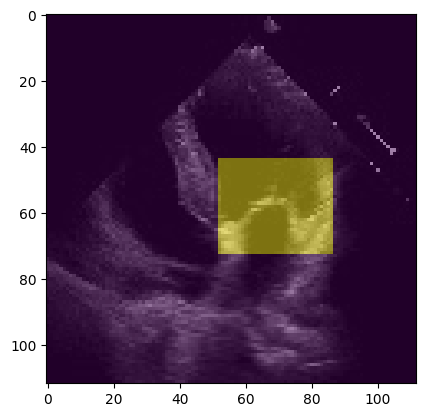

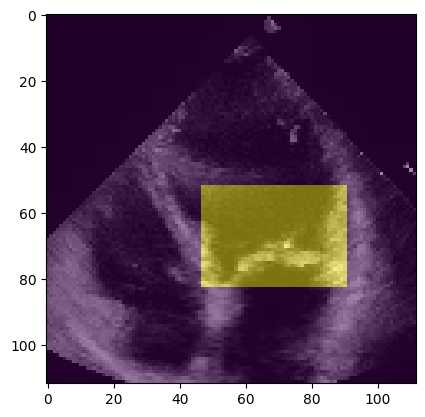

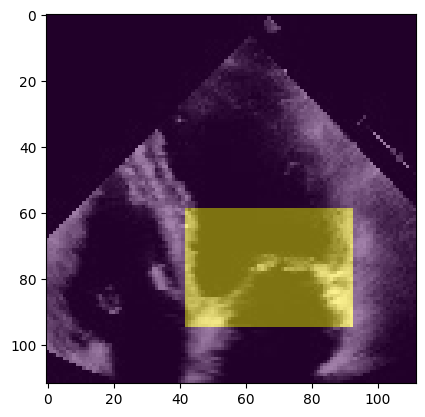

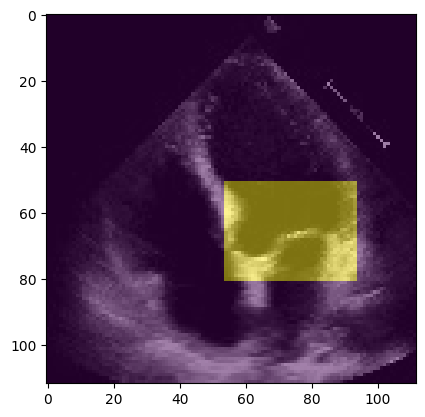

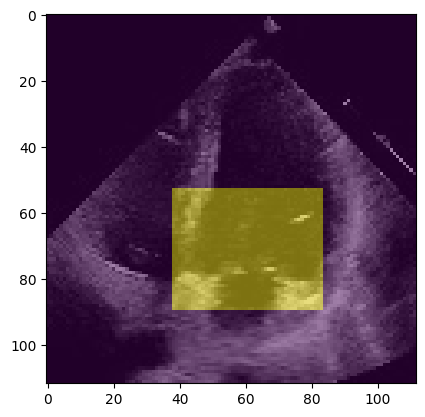

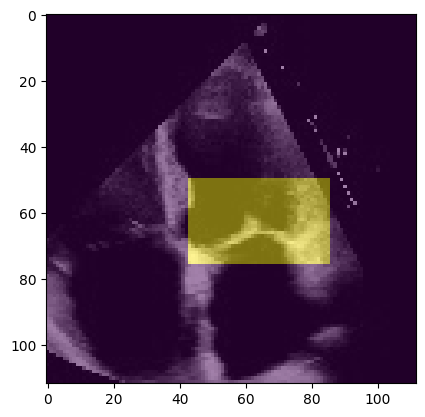

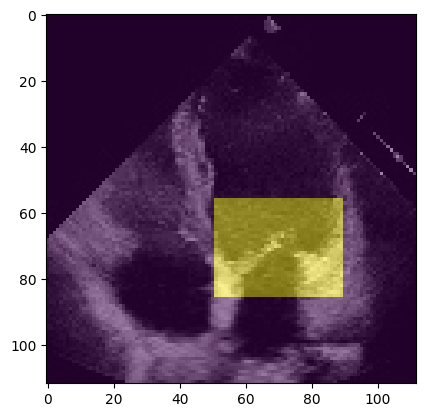

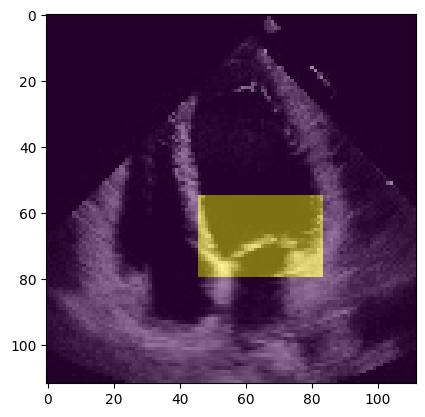

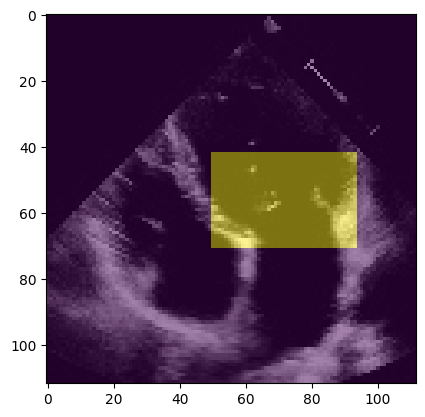

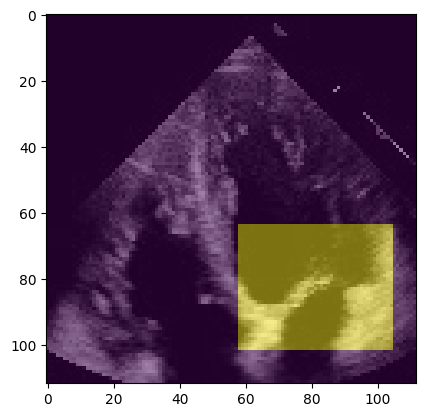

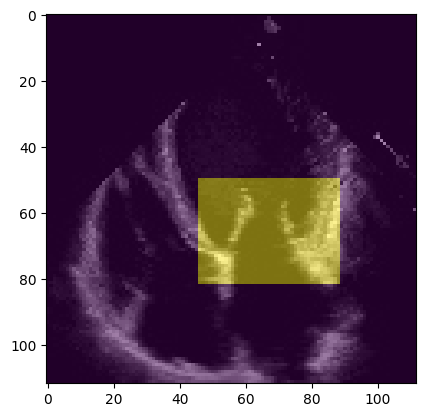

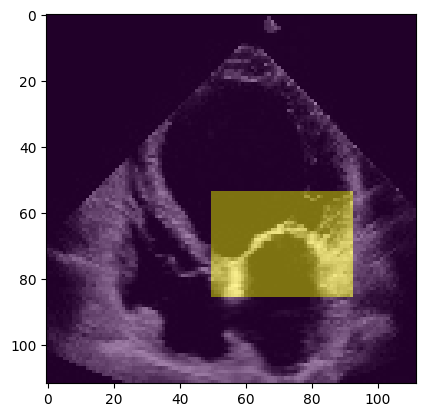

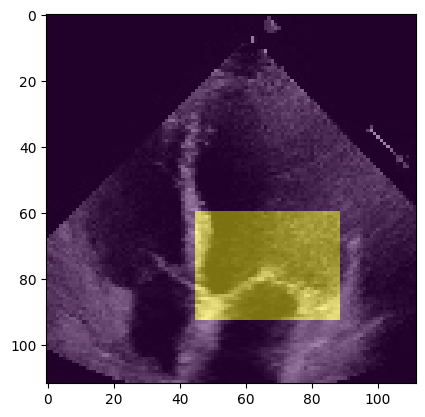

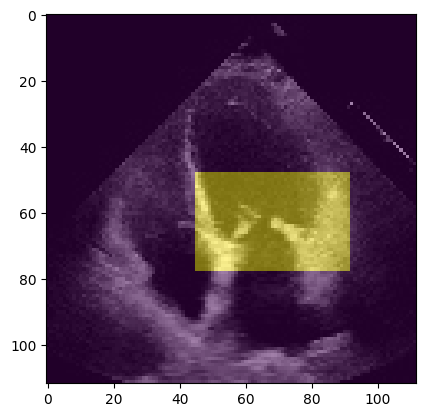

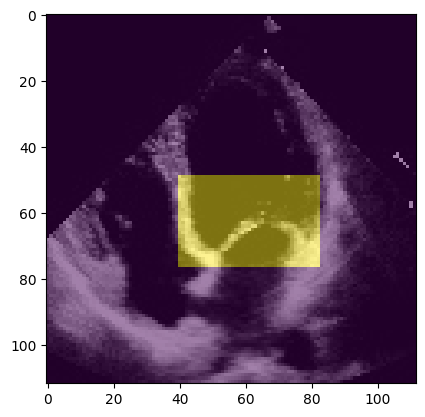

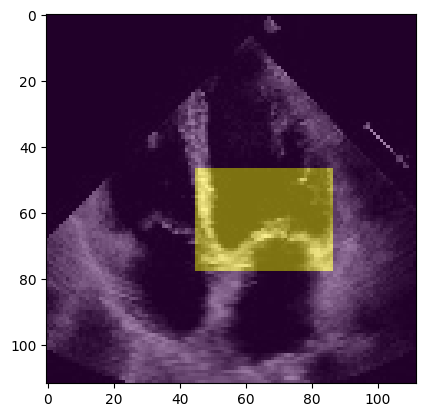

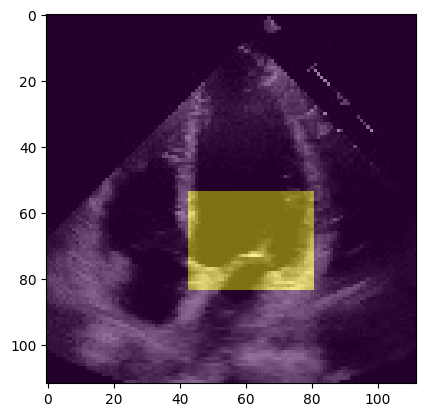

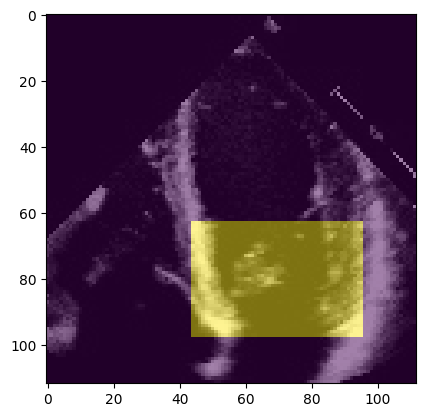

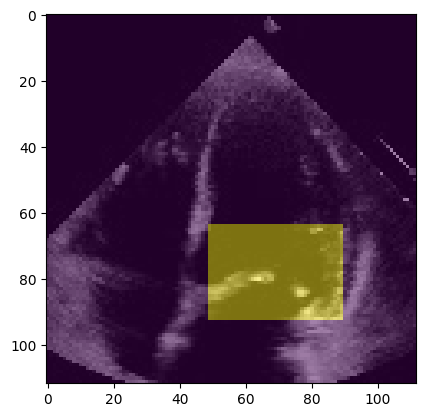

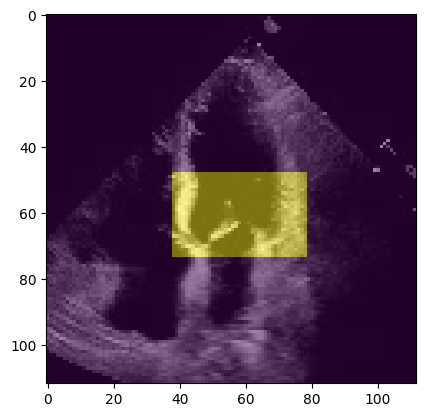

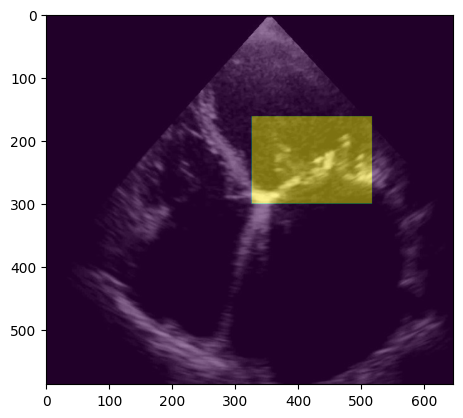

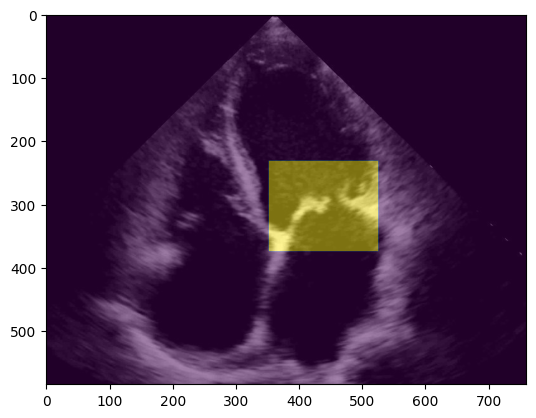

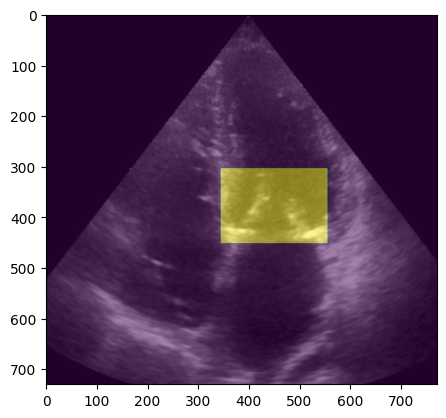

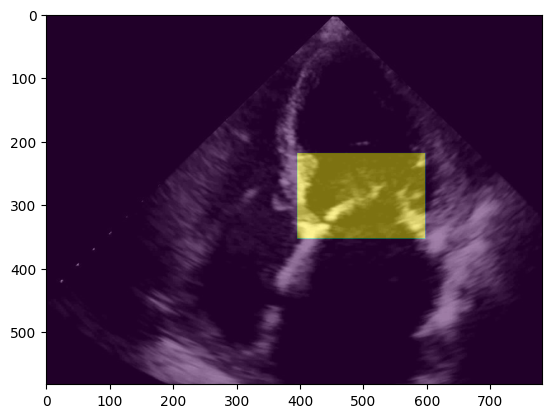

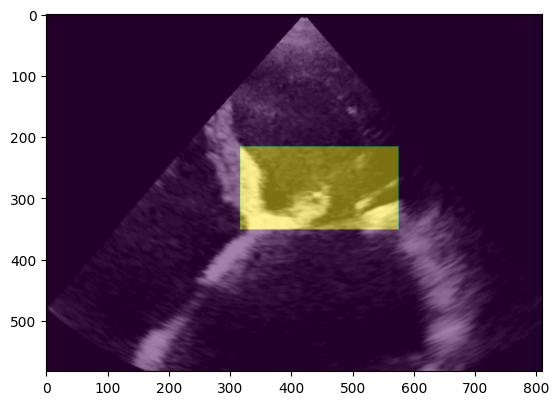

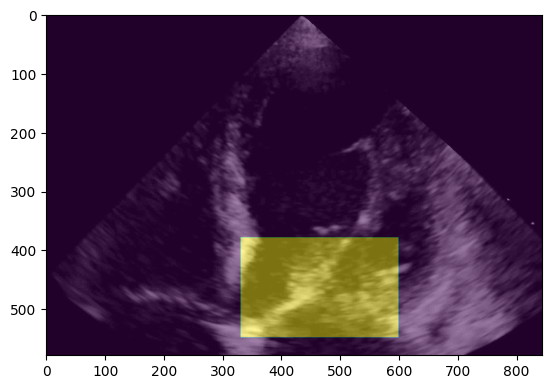

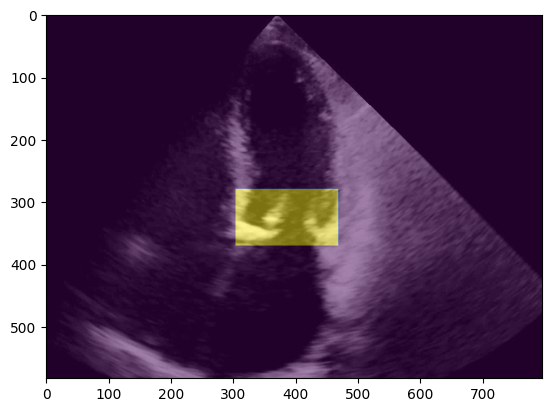

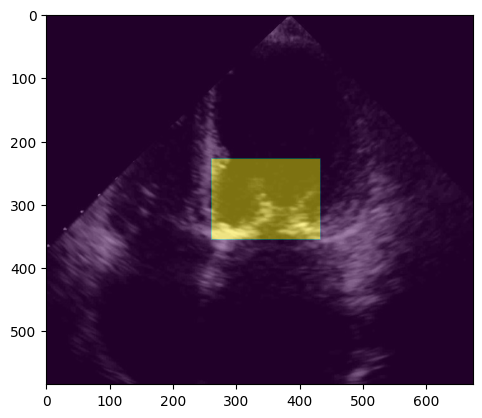

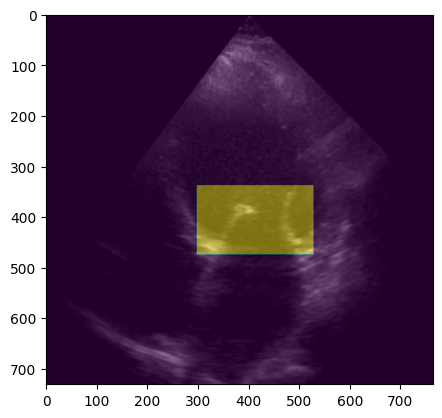

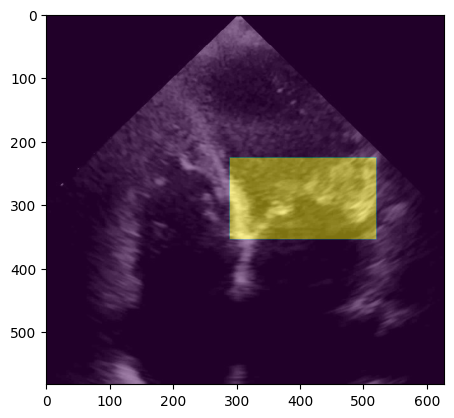

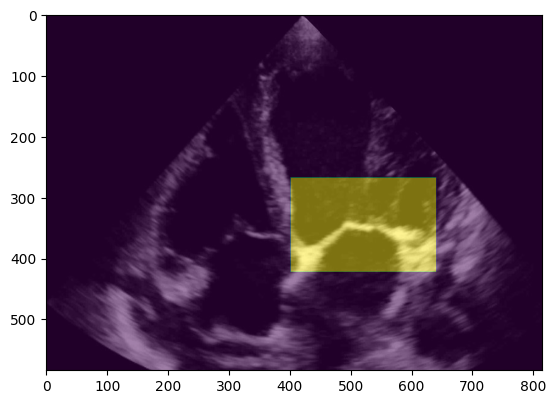

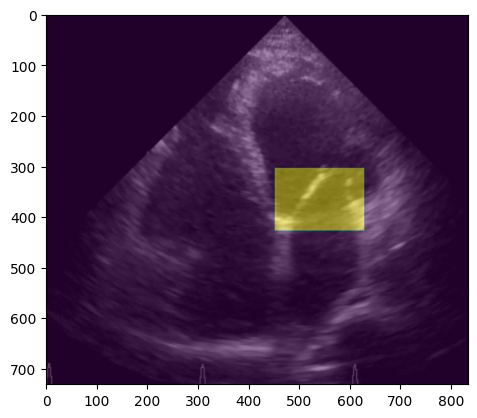

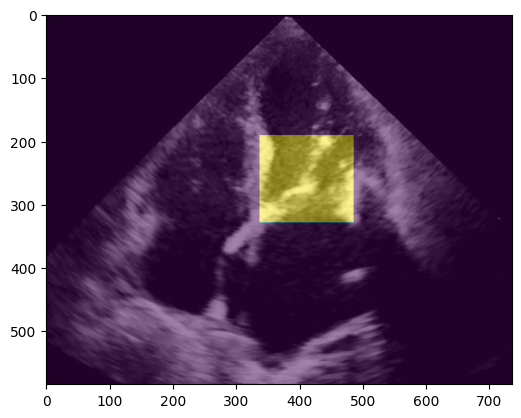

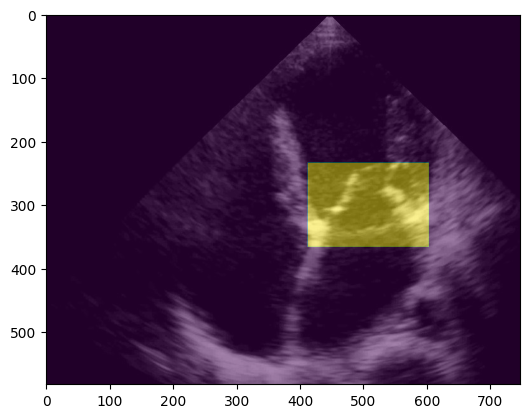

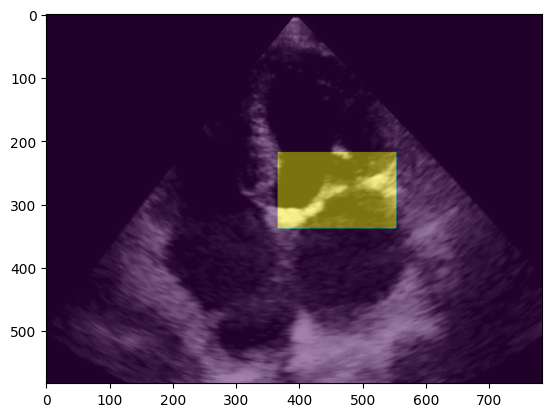

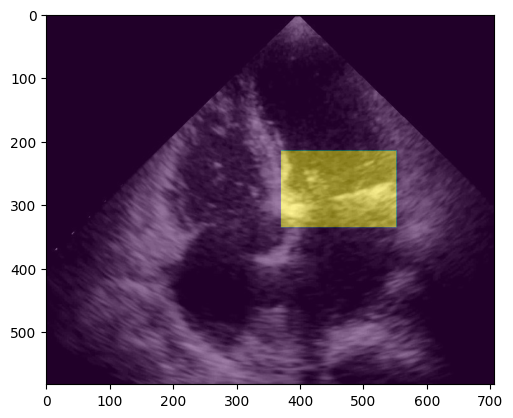

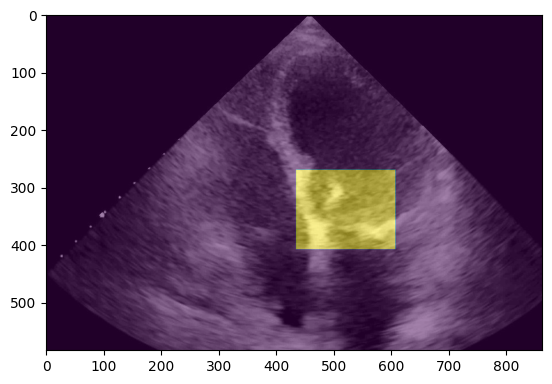

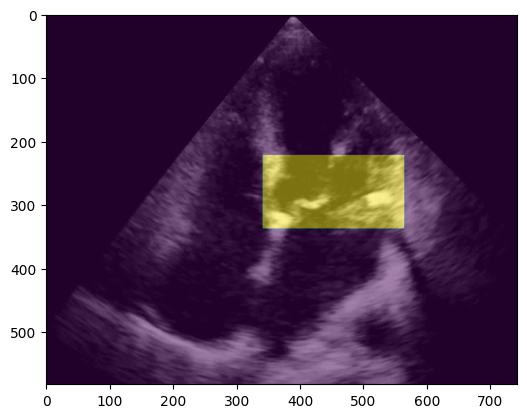

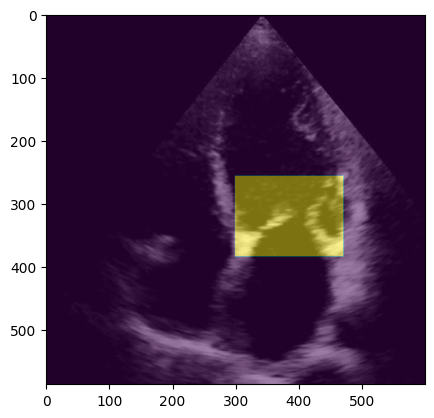

In [16]:
# Plot all samples and boxes

for sample_index in range(len(X)):

    
    label = X[sample_index]["box"].astype(int)
    label_maxed = label * 255
    label_maxed[label_maxed==0] = 1
    label_maxed[label_maxed==1] = 0

    #Raw image
    #Raw image
    labeled_frame = X[sample_index]["video"][:,:,1]



    plt.imshow(labeled_frame, cmap="gray")
    plt.imshow(label_maxed, alpha =0.5)
    plt.show()


In [ ]:
#Overlay label and image

import matplotlib.pyplot as plt
first_sample = X[4]
#Label
label = first_sample["label"][:,:,1].astype(int)
label_maxed = label * 255
label_maxed[label_maxed==0] = 1
label_maxed[label_maxed==1] = 0

#Raw image
labeled_frame = first_sample["video"][:,:,1]



plt.imshow(labeled_frame,)
plt.imshow(label_maxed, alpha =0.5)
plt.show()


#### Video

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Example data creation: a random uint8 array with shape (112, 112, 129)
new_size = (448, 448) 

# Displaying the video without exporting to a file
# Using OpenCV to display the video frames
# Displaying the video with resized frames
while True:
    for i in range(first_sample["video"].shape[2]):
        frame = first_sample["video"][:, :, i]
        resized_frame = cv2.resize(frame, new_size, interpolation=cv2.INTER_AREA)
        cv2.imshow('Frame', resized_frame)  # Display the resized frame
        if cv2.waitKey(25) & 0xFF == ord('q'):  # Press 'q' to exit
            break

cv2.destroyAllWindows()



##### Box sizes

In [ ]:
# Print all pictures and where their boxes are
rows = int(len(X)**0.5)
cols = (len(X) + rows - 1) // rows

for sample_index in range(len(X)):
    first_sample = X[sample_index]
    first_sample["box"].astype("float32")
    first_sample_scaled = first_sample["box"] * 225
    plt.subplot(rows, cols, sample_index + 1)
    plt.imshow(first_sample_scaled)
        
# THEY ARE THE SAME

In [ ]:
# Do the Boxes have different sizes? -> YES THEY DO

first_box = X[15]["box"]  

rows = int(len(X)**0.5)
cols = (len(X) + rows - 1) // rows

for sample_index in range(len(X)):
    if np.array_equal(X[sample_index]["box"], first_box) == True:
        print("same")

# YES

### Test data

In [ ]:
with gzip.open("test.pkl") as file:
    Y = pickle.load(file)

In [ ]:
print(Y[0].keys())
Y[1]["video"].shape

#### Check stuff

In [ ]:
#Find out if only label frames marked in "frames" contain True's -> YES ALL GOOD

index = 0
for frame in range(0,first_sample["label"].shape[2]):
    if first_sample["label"][:,:,frame].any() == True:
        print(index)
    index += 1
    #print(first_sample["label"][:,:,0].any())

# YES ONLY LABELED FRAMES CONTAIN TRUES 